In [50]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

import argparse
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from datetime import datetime
import datetime as dt
import time

import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage

import csv

# from 

import config
# import source.tools.load_dataset_test as load_dataset_test
import load_dataset as load_dataset_test

training_samples, valid_samples = load_dataset_test.train_test_split(
    str(config.ANNOTATION_DATA),
    config.TEST_SPLIT,
)

Training sample instances: 856
Validation sample instances: 17


In [51]:
train_numpy_dataset = load_dataset_test.AugmentFaceKeypointDataset(
    training_samples, f"{config.DATASET_PATH}/images", 0
)

[[0.22764228 0.42196745]
 [0.23747734 0.4664422 ]
 [0.24362426 0.53506037]
 [0.26575315 0.59605433]
 [0.2989465  0.649424  ]
 [0.34320428 0.69008662]
 [0.39483838 0.72185433]
 [0.44770187 0.75108055]
 [0.51162977 0.76632902]
 [0.57309897 0.75489269]
 [0.63087997 0.72312504]
 [0.67882587 0.68246242]
 [0.7218543  0.64052909]
 [0.75750639 0.58715936]
 [0.78086468 0.52870685]
 [0.79930543 0.4664422 ]
 [0.8017642  0.39782404]
 [0.66038513 0.39782404]
 [0.34935122 0.41815535]
 [0.62104487 0.3927412 ]
 [0.64317378 0.36859778]
 [0.67144961 0.35970281]
 [0.70464294 0.36224423]
 [0.72923062 0.37749273]
 [0.73168939 0.40417756]
 [0.7083311  0.42450887]
 [0.6763671  0.42705029]
 [0.64440316 0.42577958]
 [0.61366861 0.41815535]
 [0.29034083 0.40290685]
 [0.31492847 0.38257554]
 [0.34689244 0.37495131]
 [0.38131518 0.37622202]
 [0.40221467 0.39528262]
 [0.40221467 0.42450887]
 [0.3800858  0.44229876]
 [0.34935122 0.45246442]
 [0.31738725 0.45119374]
 [0.29648773 0.428321  ]
 [0.54482313 0.39401191]


[44.617886 82.70562 ]


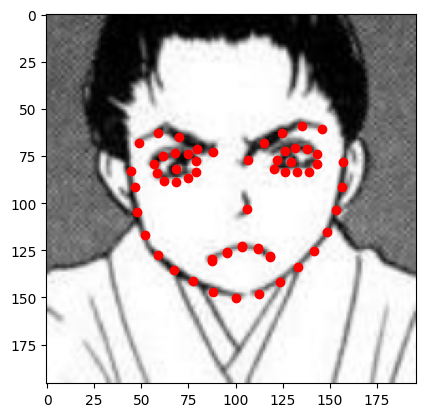

In [52]:
image = train_numpy_dataset[0][0]
keypoints = train_numpy_dataset[0][1:]
keypoints = np.array(keypoints, dtype="float32")
keypoints = config.RESIZE * keypoints[0]
print(keypoints[0])
plt.imshow(image)
plt.scatter(keypoints[:,0], keypoints[:,1], color='r')
plt.show()

In [53]:
x_sizes = []
y_sizes = []
for i in train_numpy_dataset:
    x, y , _ = i[0].shape
    x_sizes.append(x)
    y_sizes.append(y)
    # print(x_sizes)
    # print(y_sizes)
    # print(i[0].shape)
print("x_ave",sum(x_sizes) / (len(x_sizes) + 1))
print("y_ave",sum(y_sizes) / (len(y_sizes) + 1))

x_ave 195.77129521586932
y_ave 195.77129521586932


landmark_num 59
kps KeypointsOnImage([Keypoint(x=42.10243607, y=65.84209442), Keypoint(x=39.48294067, y=78.78182983), Keypoint(x=36.86344910, y=91.50943756), Keypoint(x=35.17948914, y=105.29767609), Keypoint(x=35.17948914, y=119.93442535), Keypoint(x=35.55369949, y=134.57118225), Keypoint(x=37.42476654, y=147.72303772), Keypoint(x=46.59299850, y=153.87471008), Keypoint(x=57.81940079, y=158.96575928), Keypoint(x=69.79423523, y=161.29914856), Keypoint(x=82.70458984, y=161.29914856), Keypoint(x=95.42785645, y=160.87489319), Keypoint(x=108.33821869, y=160.45065308), Keypoint(x=118.25488281, y=154.29898071), Keypoint(x=123.30676270, y=142.63200378), Keypoint(x=125.92624664, y=129.26800537), Keypoint(x=129.29417419, y=117.17678070), Keypoint(x=82.14327240, y=84.29712677), Keypoint(x=48.27695847, y=65.84209442), Keypoint(x=102.72501373, y=97.66111755), Keypoint(x=96.73760223, y=92.78219604), Keypoint(x=90.56307983, y=87.90328217), Keypoint(x=84.57566833, y=82.60010529), Keypoint(x=78.40113831

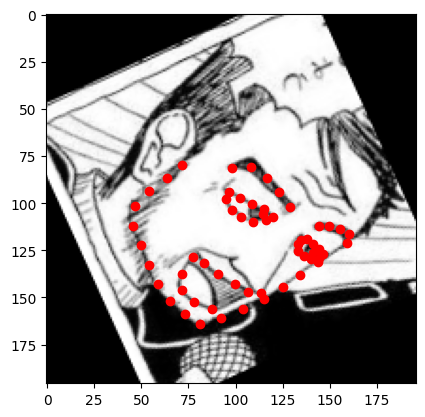

In [57]:
image = train_numpy_dataset[100][0]
keypoints = train_numpy_dataset[100][1:]
keypoints = np.array(keypoints, dtype="float32")
keypoints = config.RESIZE * keypoints[0]

landmark_num = len(keypoints) - 1
print("landmark_num",landmark_num)
kps = KeypointsOnImage(
    [Keypoint(x=keypoints[i][0], y=keypoints[i][1]) for i in range(0,landmark_num)],
    shape=image.shape,
)

print("kps",kps)

# About Augment setting
seq = iaa.Sequential(
    [
        # iaa.ShearX((-30, 30)),
        # iaa.Multiply((0.8, 1.3)),  # change brightness, doesn't affect keypoints
        iaa.Affine(
            rotate=(-80, 80),
            scale={"x": (0.5, 1.2), "y": (0.5, 1.2)},
            # cval=(10, 255),
        ),
        # iaa.Invert(0.05, per_channel=0.5),
        iaa.Fliplr(0.5),
        # iaa.RemoveSaturation((0, 0.5)),
        # iaa.AddToHueAndSaturation((-50, 50), per_channel=True),
        # iaa.UniformColorQuantizationToNBits(),
        # iaa.AdditiveGaussianNoise(scale=[0, 10]),
    ]
)

# for aug_count in range(aug_data_num):
print("データ拡張を行います")
image_aug, kps_aug = seq(image=image, keypoints=kps)
print("kps_aug",kps_aug)
keypoints = []
for i in range(len(kps.keypoints)):
    before = kps.keypoints[i]
    after = kps_aug.keypoints[i]
    keypoints.append([after.x, after.y])
    # print(after.x)
keypoints = np.array(keypoints, dtype="float32")
# print(keypoints)
# print(keypoints)

image_after = kps_aug.draw_on_image(image_aug, size=0)

plt.imshow(image_after)
plt.scatter(keypoints[:,0], keypoints[:,1], color='r')
plt.show()

# データ拡張を行った画像をリストに格納する
# data_set_list.append([image_after, keypoints])